In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

* ref: ARIMA ebook : https://otexts.com/fppkr/arima.html
* ref: 시계열 허와 실 : https://m.blog.naver.com/bluefish850/220725222798
* ref :SAS :  https://m.blog.naver.com/hsj2864/220892642198

# 1. 시계열 분석이란

### 1) 정의 
* 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법 
* 과거의 패턴이 미래에도 지속된다는 데이터의 안정성이 기본적인 가정으로 필요

### 2) 시계열 패턴

* <font color=red> $T$ </font> 추세(trend) : 데이터가 장기적으로 증가하거나 감소하는 패턴
* <font color=red> $S$ </font>계절성(seasonality) : 주, 월, 분기, 반기 단위 등 특정 시간의 주기로 나타나는 패턴
* <font color=red> $C$ </font>주기성(cycle) : 경기변동과 같이 정치, 경제, 사회적 요인에 의한 변화로,일정 주기가 없으며 장기적인 변화 현상
* <font color=red> $R$ </font> 불규칙요소(Random, Residual) : 추세, 순환, 계절성은 뺀 나머지, 돌발적인 요인에 의하여 일어나는 변화로, 예측 불가능한 임이의 변동


### 3) 시계열 패턴 분해
* <b>덧셈 분해(additive decomposition)</b>&nbsp; Trend와 Seasonal이 별개, $ y_t = S_t+T_t+R_t $
* <b>곱셈 분해(multiplicative decomposition)</b>&nbsp; Trend에 따라 Seasonal이 변화,  $ y_t = S_t*T_t*R_t $ , 데이터에 0이 존재해서는 안된다.

<font color='blue'>
<b>Additive : 시간에 지남에 따라(Trend가 변화함에 따라) 변동폭이 일정&nbsp; &nbsp; &nbsp; &nbsp;
Multiplicative : Trend가 상승함에 따라 변동폭 증가 </font></b>
<img src=./img/img33.png>


### 4) 정상성
* 시간에 따른 평균&분산이 일정한 패턴


### <font color=red> 5) 비정상성 데이터를 정상성(평균,분산 일정)으로 만드는 방법
*  <font color=red>변동폭이 일정하지 않은 경우 : 로그 변환</font>
*  <font color=red>추세, 계절성이 존재하는 경우 : 차분(y_t - y_{t-1}) </font>

<pre>
* (a)와 같이 시간에 따라 변동폭이 일정하지 않고, 추세와 계절적 영향이 존재하는 비정상 시계열 데이터
* (b)로그변환 --> 변동폭 일정
* (c)차분 --> 평균 일정
* (d)로그변환+차분 --> 평균과 분산이 일정한 정상 시계열로 변환
</pre>
<img src='./img/img3.png'>

# 2. 시계열 모델

### AR(Autoregression) 자기상관 모델
* <font color=red> 이전의 자신의 관측값을 이용하여 미래의 값을 예측하는 모델 --> 자기 자신의 과거를 사용(자기상관성)</font>
* $Y_t = (Y_{t-1} * w) + …  +c + (e_t * u)$
*  e(t) : white-noise(백색 잡음)  : 일반적인 정규분포(평균이 0, 분산이 1인 정규분포)에서 도출된 random noise 값
*  (X(t-1) * w) + b을 평균으로 가지며 u만큼을 분산으로 가지는 정규분포를 따른다
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png" width=400>

### MA(Moving Average) 이동평균 모델
* <font color=red>이전 관측값의 예측 오차(e(t-1))를 이용하여 미래 값을 예측하는 모델</font>
* 데이터의 평균값이 시간에 따라 변화하는 추이 
* $Y_t = (e_{t-1} * w) + …  +c + (e_t)$
* <img src="https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png" width=400>


### ARMA(Autoregressive Moving Average) 모델
* AR + MA 결합
* <img src='https://t1.daumcdn.net/cfile/tistory/99EAB33A5C39D1AD27'>

### ARIMA(p, d, q) 모수 설정
* <font color=red>d차 차분한 데이터에 AR과 MA 모형을 합친 모델 --> AR모형의 Lag : p,  MA모형의 Lag : q, 차분(Diffrence)횟수 : d </font>
* AR(p) = ARIMA(p, 0, 0)
* MA(q) = ARIMA(0, 0, q)
* ARMA(p, q) = ARIMA(p, 0, q)

<img src='./img/img2.png'>

# 3. 최적의 p, q 찾기 

<h3>ACF(Autocorrelation function) :자기상관함수 </h3>
<pre>
* 시차에 따른 관측치들 사이의 관련성(자기상관성)을 측정하는 함수
* 정상계열: 빠르게 0에 수렴, 비정상계열:천천히 감소
</pre>

<h3>PACF(Partial autocorrelation function) :편자기상관함수 </h3>
<pre>
* k 이외의 모든 다른 시점 관측치의 영향력을 배제하고  y_t와 y_t_k 두 관측치의 관련성을 측정하는 함수 </pre>

---
* AR의 특성을 띄는 경우, ACF는 천천히 감소하고 PACF는 시차 p이후 급격히 감소
* MA의 특성을 띄는 경우, ACF는 시차 q이후 급격히 감소하고 PACF는 천천히 감소
* 급격히 감소하는 시차를 각 AR과 MA 모형의 모수(p, q)로 사용


<img src='./img/img4.png' width=1200>

# Quiz?
<img src='./img/img5.png'>

# arima를 활용한 날씨데이터 예측

In [3]:
ws = pd.read_csv('./datasets/Weather Station Locations.csv')

In [4]:
df = pd.read_csv('./datasets/Summary of Weather.csv', parse_dates = ['Date'])

df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-07-01,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-07-02,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-07-03,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-07-04,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-07-05,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[df['STA']==10001][['Date','MeanTemp']]


In [6]:
df = df.set_index('Date')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1157 entries, 1942-07-01 to 1945-08-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MeanTemp  1157 non-null   float64
dtypes: float64(1)
memory usage: 18.1 KB


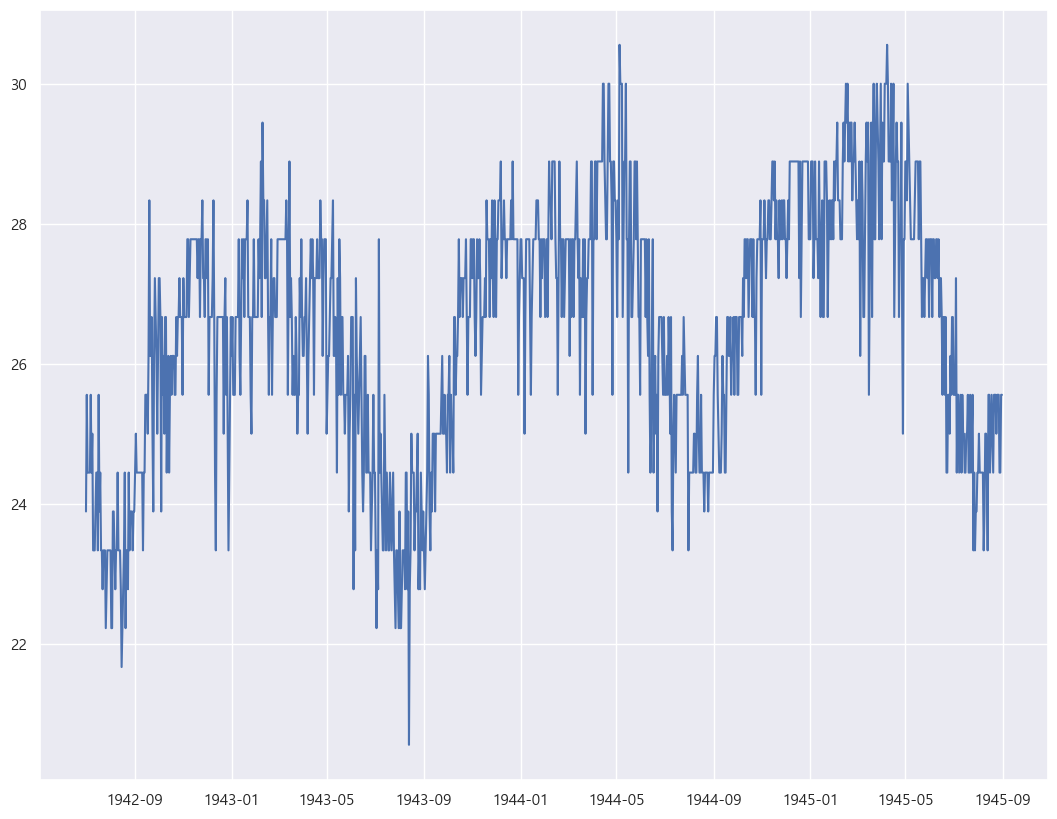

In [8]:
plt.figure(figsize = (13,10))
plt.plot(df)

## 시계열성 분해

    - statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

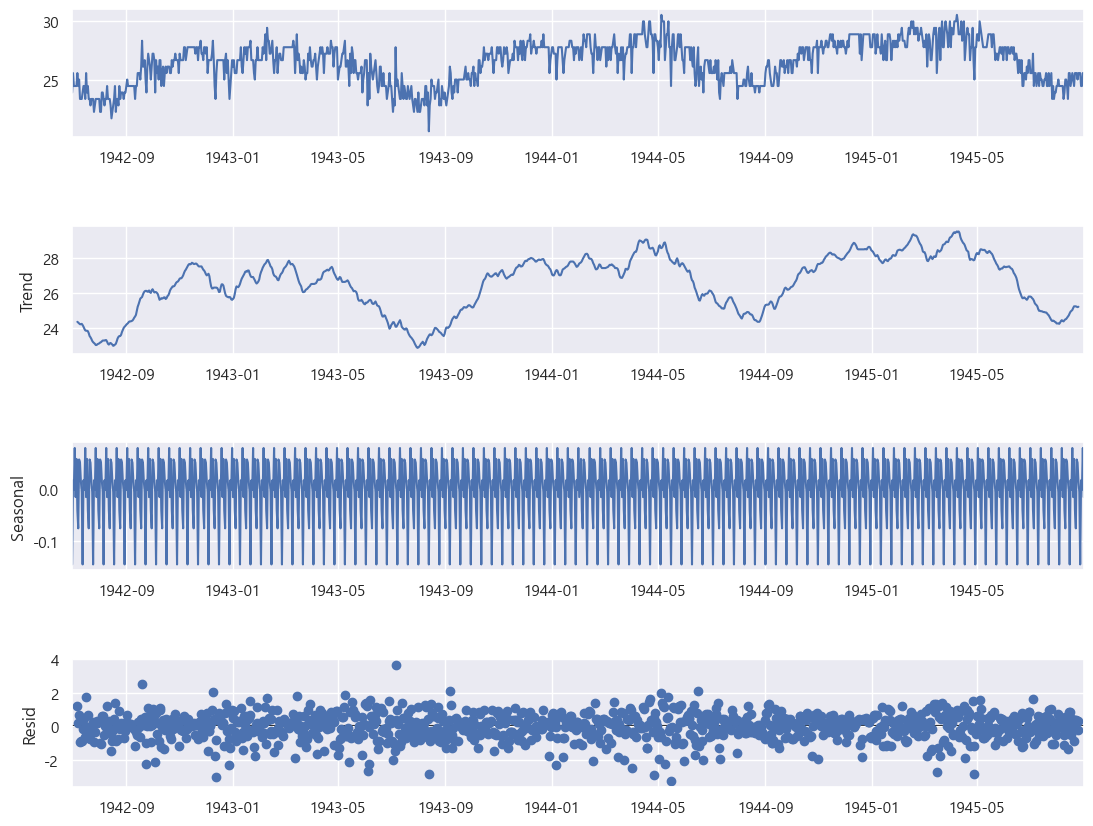

In [10]:
res = seasonal_decompose(df, model = 'additive', period = 12 )
fig = plt.figure()
fig = res.plot()
fig.set_size_inches(12,9) 
plt.show()
#모델 방식은 더하는 방식
# 주기는 12(위의 차트를 보면 1년 단위로 모양이 바뀐다.)

## 정상성 검증

<pre>

[플롯으로 그릴 수 있는 API]



[ACF]
statsmodels.graphics.tsaplots.plot_acf¶
statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)


[PACF]
statsmodels.graphics.tsaplots.plot_pacf¶
statsmodels.graphics.tsaplots.plot_pacf(x, ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation', zero=True, vlines_kwargs=None, **kwargs)

## 시계열 데이터 ADF 정상성 검증하는 방법

    - Augmented Dickey-Fuller test
    - adfuller : 귀무가설은 정상성을 띄고있지 않다
    - 검증조건 : p-value 5% 이내면 reject로 대체가설 선택 된다.
    - 귀무가설(H0) : non-stationary
    - 대체가설(H1) : stationary

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adf = adfuller(df)
adf

p_value = adf[1]
print(adf, p_value)

# pvalue = 0.05 / '이 데이터는 비정상성이다' 라는 일반적 사실(귀무가설)
# pvalue가 0.05 이하면, 데이터는 정상성을 보인다고 말한다.
# pvalue(0.05) < 0.1383 = 0.05보다 크기 때문에, 이 데이터는 비정상성 데이터다.

(-2.4119738963740303, 0.13838534571230782, 12, 1144, {'1%': -3.436079050499444, '5%': -2.8640697479399972, '10%': -2.5681169015905425}, 2851.0688744560252) 0.13838534571230782


In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 검증 

In [14]:
df_diff = df - df.shift(1)
df_diff

# 1일차 '차분'하세요.
# 원본 df에서 shift한 값을 빼낸 것이다.

,MeanTemp
Date,
1942-07-01,NaN
1942-07-02,1.666667
1942-07-03,-1.111111
1942-07-04,0.000000
1942-07-05,0.000000
...,...
1945-08-27,0.000000
1945-08-28,-1.111111
1945-08-29,0.000000


In [15]:
df_diff = df_diff.fillna(0)

df_diff.isna().sum()

MeanTemp    0
dtype: int64

## 데이터를 1차분 한 결과 : 정상성을 보인다.

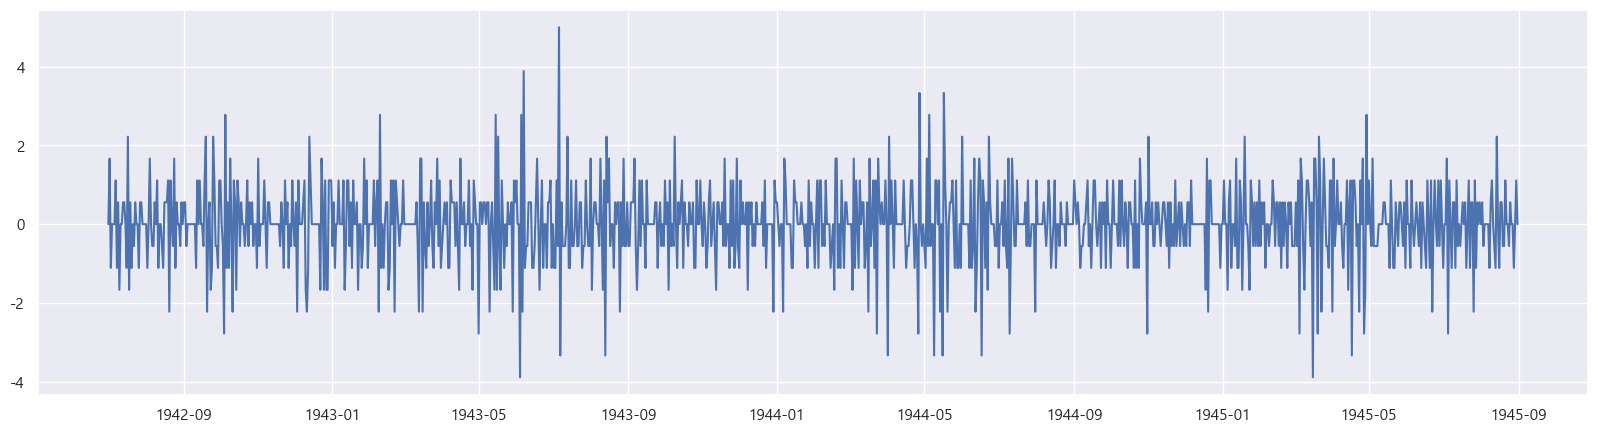

In [16]:
fig = plt.figure()
plt.plot(df_diff)
fig.set_size_inches(20,5) 
plt.show()

In [17]:
df_diff.isna().sum()

MeanTemp    0
dtype: int64

In [18]:
df_diff

,MeanTemp
Date,
1942-07-01,0.000000
1942-07-02,1.666667
1942-07-03,-1.111111
1942-07-04,0.000000
1942-07-05,0.000000
...,...
1945-08-27,0.000000
1945-08-28,-1.111111
1945-08-29,0.000000


In [19]:
# adf = adfuller(df_diff)


p_value = adf[1]
print(p_value)

0.13838534571230782


# ACF / PACF

* 정상성의 데이터를 가지고 판단

In [20]:
plt.figure()
ax1 = plt.subplot

<Figure size 640x480 with 0 Axes>

* ACF = MA(1) #1차분해라
* PACF = AR() #두번 째 그래프 : 지수적 감소를 하고 있다 = 서서히 감소하고 있다. = AR 모형은 적합해보이지 않다.

* 쓴다면, ARIMA(0,1,1) 모형을 쓴다. # AR은 0으로 하겠다. d = 1 , ma = 1
* p = 0, d = 1, q = 1

# ARIMA import

<b> class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0),</b> 

trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [22]:
df.head()

,MeanTemp
Date,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 


In [24]:
train, val = train_test_split(df, test_size=3)
# 테스트 사이즈 정수 n으로 놓으면 갯수로 분할해준다.

train.shape, val.shape

((1154, 1), (3, 1))

In [25]:
train = df.iloc[:1111, :]
val = df.iloc[1111:, :]

train.shape, val.shape

((1111, 1), (46, 1))

In [26]:
df

,MeanTemp
Date,
1942-07-01,23.888889
1942-07-02,25.555556
1942-07-03,24.444444
1942-07-04,24.444444
1942-07-05,24.444444
...,...
1945-08-27,25.555556
1945-08-28,24.444444
1945-08-29,24.444444


In [29]:
# plt.plot(df.index, train)
# plt.plot(pred) #예측데이터

# # plt.show()

                               SARIMAX Results                                
Dep. Variable:               MeanTemp   No. Observations:                 1157
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1472.685
Date:                Wed, 05 Apr 2023   AIC                           2949.369
Time:                        10:02:28   BIC                           2959.475
Sample:                             0   HQIC                          2953.183
                               - 1157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7306      0.019    -38.705      0.000      -0.768      -0.694
sigma2         0.7478      0.023     32.883      0.000       0.703       0.792
Ljung-Box (L1) (Q):                  23.80   Jarque-

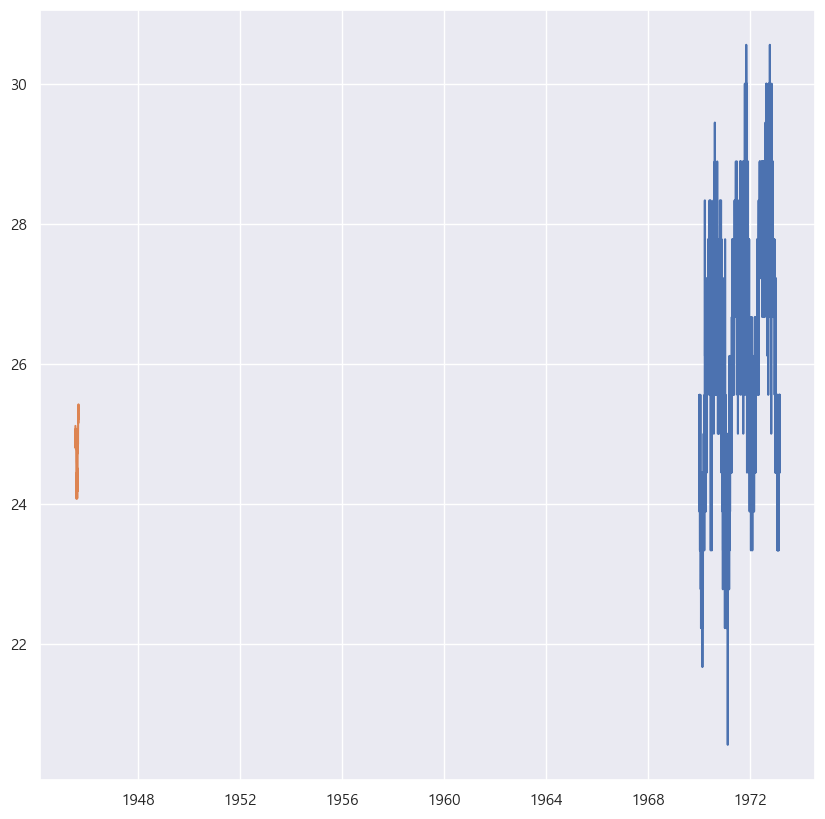

In [33]:
train = df.iloc[:1111, :]
val = df.iloc[1111:, :]

#train, val 분할 하드코딩

# ------  모델 ----------
model = ARIMA(df, order=(0,1,1)) # 차분하기 전의 원본 데이터 넣어주기 그럼(0,1,1)
model_fit = model.fit()

#---------------평가-----------
print(model_fit.summary()) #학습 어떻게 했는지 서머리


# ------ 예측 ----------
forecast = model_fit.forecast(steps=46) # steps = 46개(46일) 정답 맞춰보고싶다. 위의 스플릿한 갯수

pred2 = model_fit.predict(1109,1154, typ='levels') # 타입 디폴트 : 리니어(선형) = 차분에 대한 결과가 나온다.
# 1-45일까지

score = np.sqrt(mean_squared_error(val, pred2))
print(pred2.values)
print(score)
plt.figure(figsize=(10,10))
plt.plot(df.values)
plt.plot(pred2)

# ols 레포트

* no.observation : 관측된 설명 수
* coef, std, err , 

# 4. [실습] ARIMA를 활용한 비트코인 가격 예측

In [46]:
import pandas as pd

sr = pd.read_csv('./datasets/arima_dataset.csv') #, header=0, index_col='Timestamp', squeeze=True
sr = sr.set_index(sr['date'])
# sr = sr.drop('date',axis = 1)
sr.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [54]:
df = pd.read_csv('./datasets/market-price.csv',header=0, index_col='Timestamp', squeeze=True)
df.tail()

Timestamp
2021-09-22 00:00:00    40619.27
2021-09-23 00:00:00    43604.76
2021-09-24 00:00:00    44888.96
2021-09-25 00:00:00    42815.56
2021-09-26 00:00:00    42742.01
Name: market-price, dtype: float64

In [52]:
df = pd.DataFrame(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2021-07-28 00:00:00 to 2021-09-26 00:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   market-price  61 non-null     float64
dtypes: float64(1)
memory usage: 976.0+ bytes


<Figure size 640x480 with 0 Axes>

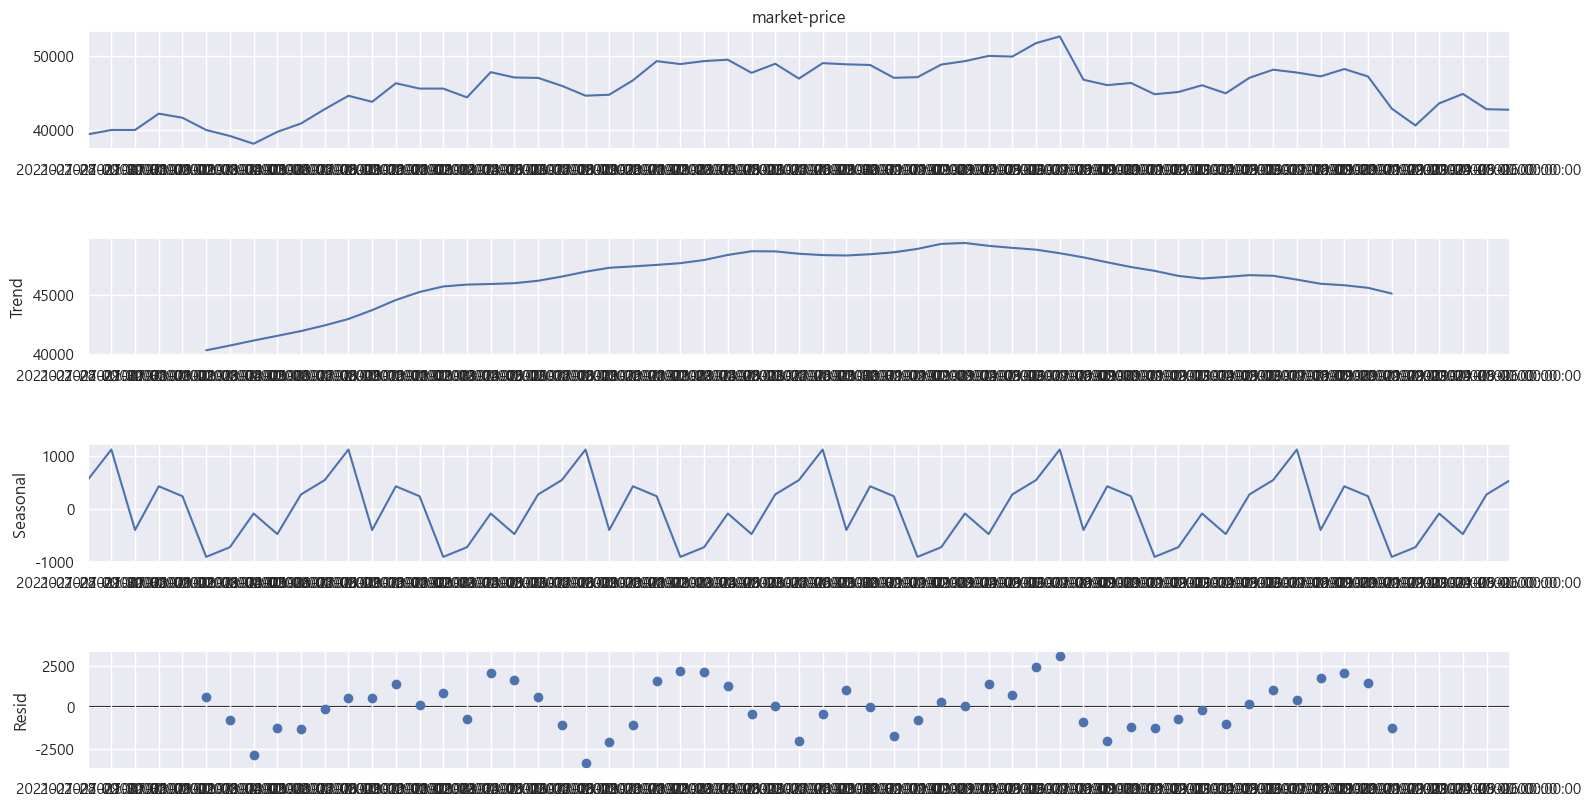

In [70]:
res = seasonal_decompose(df, model = 'additive', period = 10 )
fig = plt.figure()
fig = res.plot()
fig.set_size_inches(20,9) 
plt.show()

<AxesSubplot: xlabel='Timestamp'>

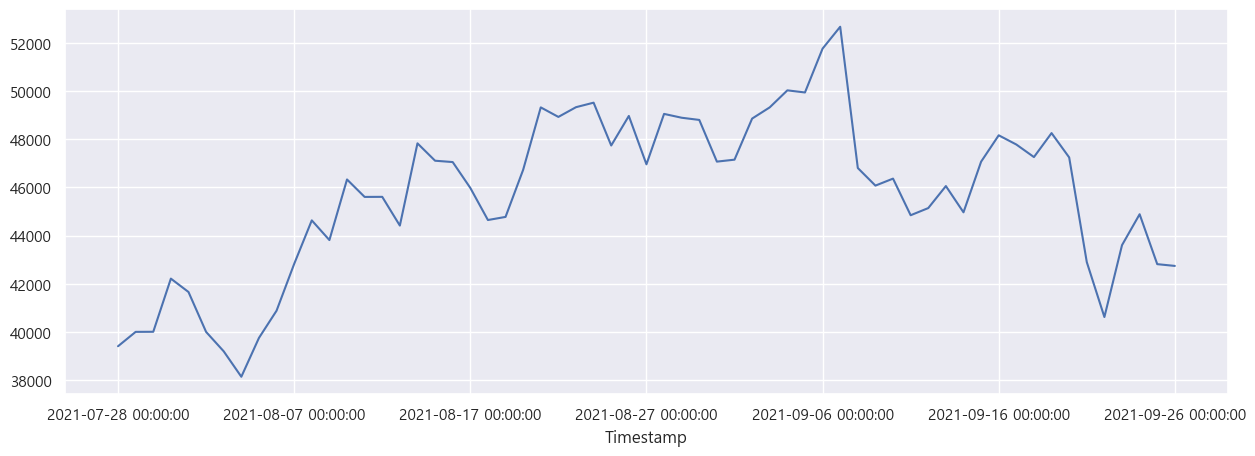

In [57]:
plt.figure(figsize = (15,5))
df.plot()

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

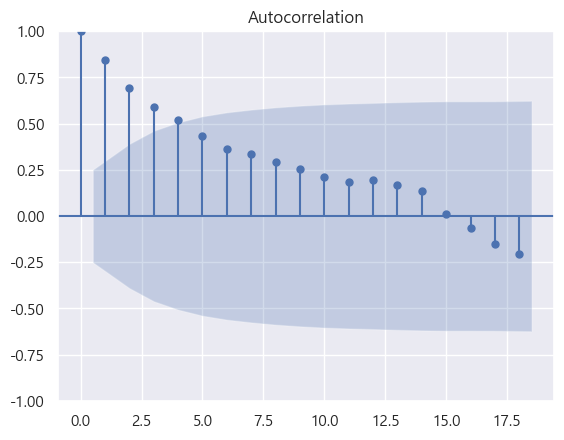

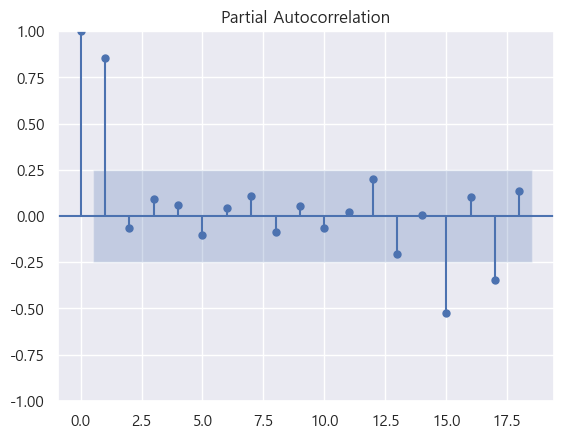

In [61]:
plot_acf(df), plot_pacf(df)

In [93]:
adf = adfuller(df)
adf

p_value = adf[1]
print(p_value)

0.1552493687047632


* pvalue 가  0.05보다 크기 때문에, 비정상성을 띄고 있다.

## 1차분

In [84]:
df_diff = df - df.shift(1)
df_diff.head()

Timestamp
2021-07-28 00:00:00        NaN
2021-07-29 00:00:00     596.58
2021-07-30 00:00:00       3.40
2021-07-31 00:00:00    2208.22
2021-08-01 00:00:00    -555.09
Name: market-price, dtype: float64

In [85]:
df_diff = df_diff.fillna(0)

df_diff.isna().sum()

0

## 1차분 결과

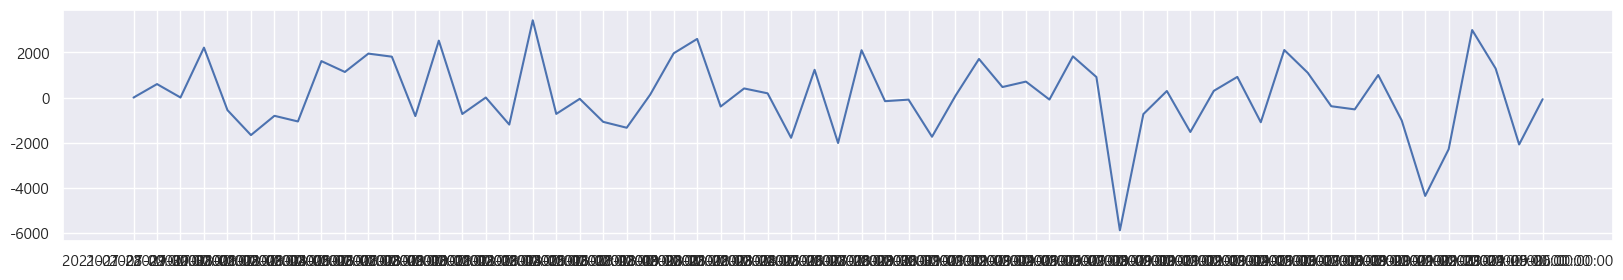

In [86]:
fig = plt.figure()
plt.plot(df_diff)
fig.set_size_inches(20,3) 
plt.show()

In [94]:
train, val = train_test_split(df, test_size=10,shuffle = False)
# 테스트 사이즈 정수 n으로 놓으면 갯수로 분할해준다.

df.shape, train.shape, val.shape

((61,), (51,), (10,))

                               SARIMAX Results                                
Dep. Variable:           market-price   No. Observations:                   61
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -530.178
Date:                Wed, 05 Apr 2023   AIC                           1064.356
Time:                        10:34:09   BIC                           1068.545
Sample:                    07-28-2021   HQIC                          1065.995
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0168      0.155      0.109      0.913      -0.286       0.320
sigma2      2.873e+06   4.16e+05      6.898      0.000    2.06e+06    3.69e+06
Ljung-Box (L1) (Q):                   0.03   Jarque-

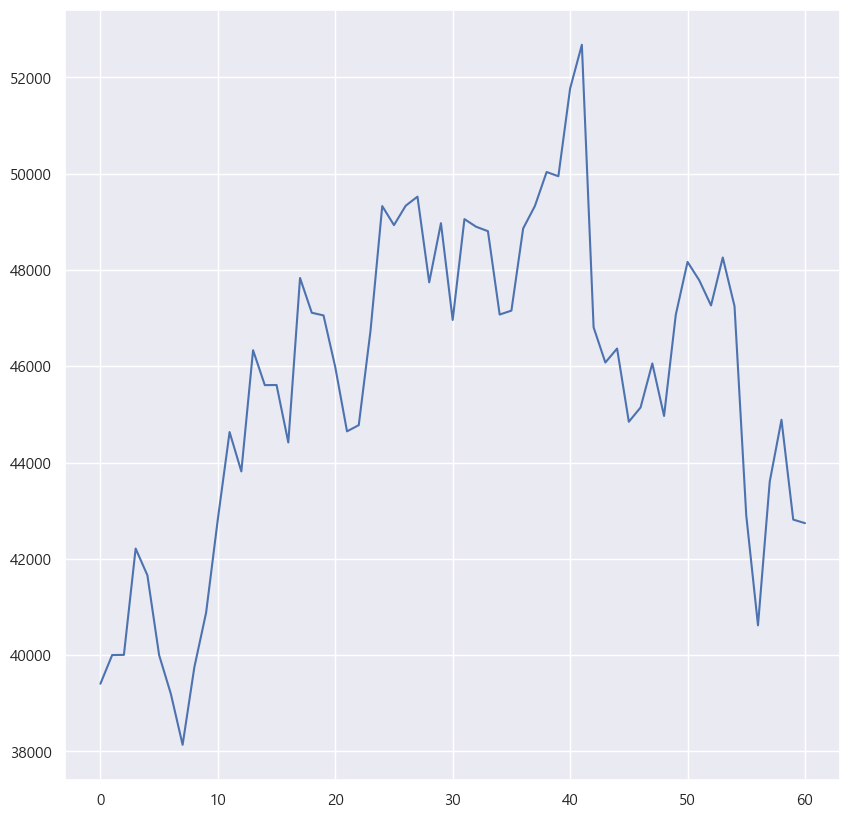

In [99]:
# train = df.iloc[:1111, :]
# val = df.iloc[1111:, :]

#train, val 분할 하드코딩

# ------  모델 ----------
model = ARIMA(df, order=(0,1,1)) # 차분하기 전의 원본 데이터 넣어주기 그럼(0,1,1)
model_fit = model.fit()

#---------------평가-----------
print(model_fit.summary()) #학습 어떻게 했는지 서머리


# ------ 예측 ----------
forecast = model_fit.forecast(steps=10) # steps = 46개(46일) 정답 맞춰보고싶다. 위의 스플릿한 갯수

pred2 = model_fit.predict(52,61, typ='levels') # 타입 디폴트 : 리니어(선형) = 차분에 대한 결과가 나온다.
# 1-45일까지

score = np.sqrt(mean_squared_error(val, pred2))
print(pred2.values)
print(score)
plt.figure(figsize=(10,10))
plt.plot(df.values)

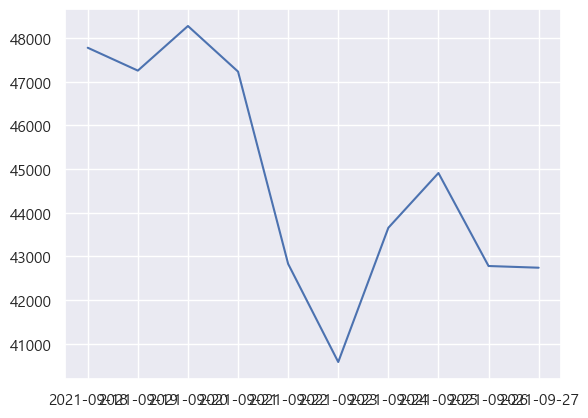

In [100]:
plt.plot(pred2)

In [105]:
df = pd.DataFrame(df)
df

,market-price
Timestamp,
2021-07-28 00:00:00,39405.95
2021-07-29 00:00:00,40002.53
2021-07-30 00:00:00,40005.93
2021-07-31 00:00:00,42214.15
2021-08-01 00:00:00,41659.06
2021-08-02 00:00:00,40000.46
2021-08-03 00:00:00,39193.94
2021-08-04 00:00:00,38138.00
2021-08-05 00:00:00,39750.14


# 인덱스 문제?

In [107]:
# train = df['market-price'][:55]
# test = df['market-price'][55:]

# res = ARIMA(train, order=(1,0,0)).fit()
# fore = res.forecast(steps=100)
# pred = res.predict(train.index[0],train.index[-1], typ='levels') # linear: 차분, levels: 원본

# plt.figure(figsize=(14,4))
# plt.plot(train)
# plt.plot(fore)
# plt.plot(pred)
# plt.show()

<pre>

Dep. Variable    : 타겟변수명
Model            : OLS
Method           : Least Squares(최소제곱)
No. Observations : 샘플갯수(10건)
Df Residuals     : 잔차자유도(샘플갯수-종속변수갯수(y)-독립변수갯수(x))
Df Model         : 독립변수 갯수(x)
Covariance Type  : nonrobust(non-constant variance)

---------------------------------------------------------

<font color=red><b>R-squared(R2)</b></font>    : 결정계수(회귀식의 설명력) =  SSReg / SST
                   전체 데이터에서 회귀모델이 설명할 수 있는 데이터 비율
                   회귀모델 y = 1.3x + 37은 전체 데이터의 66%를 설명할 수 있다
Adj. R-squared    : 보정된 R2

<font color=red><b>F-statistic</b></font>       : F분포(통계량)
                    F통계량으로 회귀모델 y = 1.3x + 37의 적절성 평가
Prob (F-statistic): F분포(통계량) 유의수준

<font color=red><b>AIC</b></font> BIC           : 손실 가중치 계산 (낮을 수록 좋음)
                  : X피쳐를 이용해 Y를 예측할 수 있는 정도
                    AIC (Akaikie’s Information Criteria)
                    BIC (Bayesian Information Criterion)
                    
---------------------------------------------------------

<font color=red><b>coef</b></font>              : 회귀계수(클수록 y에 영향도가 크다)
std err           : 표준오차 (오차합 / 표준편차) (낮을 수록 좋음)
t                 : t테스트 (평균값이용 : x피쳐가 y에 영향을 주는 정도 : 상관도)
<font color=red><b>P>|t|</b></font>             : 유의수준 (p-value)
[0.025 0.975]     : 신뢰구간

---------------------------------------------------------

Omnibus           : 비대칭도(왜도) 정규성 테스트 값 (크다:정규분포를 따른다)
Prob(Omnibus)     : Omnibus 유의수준

<font color=red><b>Skew</b></font>              : 왜도 (좌우 비대칭도)
<font color=red><b>Kurtosis</b></font>          : 첨도(뾰족)
Durbin-Watson     : (DW검정)잔차의 독립성을 확인할 수 있는 수치
                     1.5 ~ 2.5 사이이면 독립으로 판단(회귀 모형이 적합하다)
                     0 : 잔차들이 양의 자기 상관
                     2 : 독립성(자기 상관이 없다)
                     4 : 잔차들이 음의 자기 상관


<pre> <font color=red><b>
R-squared(R2) : 1이면 좋다
F-statistic   : 크다 = 분산의 분포에 차이가 있다(=겹치지않는다=두 피쳐가 다르다)
AIC           : 낮을 수록 좋음
coef          : 클수록 y에 영향도가 크다 
P>|t|         : 0.05보다 낮아야 유의미하다
Skew          : 정규분포의 왜도 0  
Kurtosis      : 정규분포의 첨도 0  

# OLS 실습(보스턴)

In [108]:
df = pd.read_csv('./datasets/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [111]:
import statsmodels.api as sm
# model = sm.OLS(y, x)
from statsmodels.regression.linear_model import OLS

In [112]:
y = df['MEDV']
X = df.drop('MEDV', axis=1)



x = sm.add_constant(X)  #--- 상수항결합  (+b)
model = OLS(y, x)
fit_res = model.fit()
fit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          6.72e-135
Time:                        10:54:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## OLS 리포트를 활용한 리니어 결과

In [113]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])